In [1]:
from sklearn.cluster import KMeans
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# finding clusters of amenities and their centers for optimal hotel booking locations

In [3]:
# What if I want to book a hotel based on nearest frozen dessert places?
chain_restaurants_amenities = pd.read_json('chain-resturants-vancouver.json', lines=True)
chain_restaurants_amenities

,lat,lon,amenity,name,tags,closest_name
0,49.213000,-122.921101,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'internet_acces...",White Spot
1,49.276156,-123.128164,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'addr:housenumb...",White Spot
2,49.280070,-122.969769,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'addr:housenumb...",White Spot
3,49.045922,-122.782154,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'addr:housenumb...",White Spot
4,49.129415,-122.318647,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'website': 'htt...",White Spot
...,...,...,...,...,...,...
341,49.279619,-123.117481,fast_food,A&W,"{'brand:wikidata': 'Q2818848', 'addr:housenumb...",A&W
342,49.191719,-123.111856,fast_food,A&W,"{'delivery': 'no', 'addr:housenumber': '100-30...",A&W
343,49.154043,-123.124961,fast_food,A&W,{},A&W
344,49.219267,-123.040835,fast_food,A&W,"{'brand:wikidata': 'Q2818848', 'internet_acces...",A&W


In [4]:
X = chain_restaurants_amenities[['lat','lon']].values
# use Within-Cluster-Sum-of-Squares (WCSS)
wcss=[]

In [5]:
# use the elbow method to find the number of k-means clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[23.618073001737656,
 8.477798635166682,
 3.4907128279424753,
 2.4357626388710365,
 1.9097654119252665,
 1.5598253762360905,
 1.2385613083867857,
 1.0426207421056795,
 0.9274558613449135,
 0.8449436104631997]

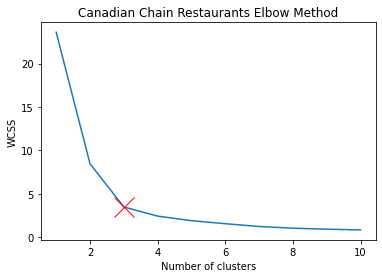

In [6]:
plt.plot(range(1,11), wcss)
plt.title('Canadian Chain Restaurants Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(3, 3.4907128279424753, color='red', marker = 'x', markersize=20, alpha=1)
plt.show()

In [7]:
# graph shows cluster = 3 is a good number
kmeans = KMeans(n_clusters=3, init ='k-means++')
y_kmeans = kmeans.fit_predict(X)

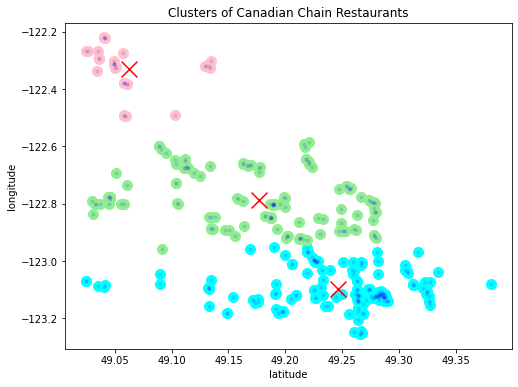

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(chain_restaurants_amenities['lat'], chain_restaurants_amenities['lon'], 'b.', alpha=0.1)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='cyan', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='lightgreen', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='pink', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='red', marker='x', label = 'Centroids',alpha=1)
plt.title('Clusters of Canadian Chain Restaurants')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()
food_chains_center = kmeans.cluster_centers_

In [9]:
# What if I want to book a hotel based on the convenience of transportation amenities?
transport_amenities = pd.read_json('transportation-amenities-vancouver.json', lines=True)
transport_amenities

,lat,lon,amenity,name,tags
0,49.262503,-123.114403,bicycle_rental,10th & Cambie,"{'ref': '0001', 'operator': 'Vancouver Bike Sh..."
1,49.262220,-123.109316,bicycle_rental,10th & Columbia,"{'ref': '0172', 'capacity': '14', 'network': '..."
2,49.261412,-123.070159,bicycle_rental,10th & Commercial,"{'ref': '0244', 'capacity': '26', 'network': '..."
3,49.261471,-123.089487,bicycle_rental,10th & Fraser,"{'ref': '0260', 'capacity': '14', 'network': '..."
4,49.262592,-123.138880,bicycle_rental,10th & Granville,"{'ref': '0070', 'capacity': '24', 'network': '..."
...,...,...,...,...,...
378,49.266643,-123.116065,car_sharing,None,"{'operator': 'Car2go', 'capacity': '5'}"
379,49.266854,-123.115754,car_sharing,None,"{'operator': 'Zipcars', 'capacity': '2'}"
380,49.284624,-123.127353,car_sharing,None,"{'operator': 'Modo', 'capacity': '1'}"
381,49.194644,-123.130984,bicycle_rental,None,"{'fee': 'yes', 'capacity': '10', 'network': 'U..."


In [10]:
# use the elbow method to find the number of k-means clusters
wcss = []
X = transport_amenities[['lat','lon']].values
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[7.472058189112036,
 1.8553992110263318,
 0.8483572964296922,
 0.5870978210631496,
 0.41958801069697166,
 0.3008355728812653,
 0.2337103522892066,
 0.1985658102276014,
 0.16573981718571668,
 0.138351879910319]

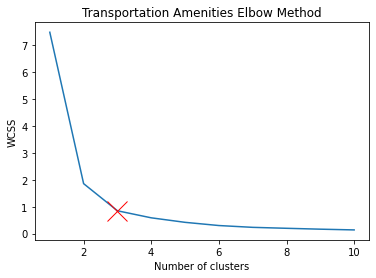

In [11]:
plt.plot(range(1,11), wcss)
plt.title('Transportation Amenities Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(3, 0.8483572964296922, color='red', marker = 'x', markersize=20, alpha=1)
plt.show()

In [12]:
# graph shows cluster = 3 is a good number
kmeans = KMeans(n_clusters=3, init ='k-means++')
y_kmeans = kmeans.fit_predict(X)

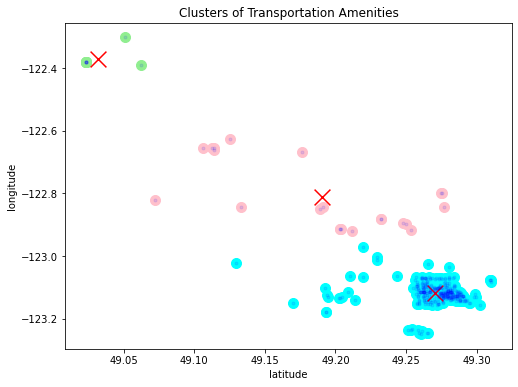

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(transport_amenities['lat'], transport_amenities['lon'], 'b.',alpha=0.1)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='cyan', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='lightgreen', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='pink', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='red', marker='x', label = 'Centroids',alpha=1)
plt.title('Clusters of Transportation Amenities')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()
transport_center = kmeans.cluster_centers_

In [14]:
# What if I want to book a hotel based on nearest bars and pubs?
alcohol_amenities = pd.read_json('alcohol-licensed-vancouver.json', lines=True)
alcohol_amenities

,lat,lon,amenity,name,tags,closest_name
0,49.185144,-123.130217,restaurant,0755 Restaurant & Lounge,"{'addr:housenumber': '3779', 'addr:street': 'S...",0755 Restaurant & Lounge
1,49.281603,-123.132898,bar,1181,"{'addr:housenumber': '1181', 'website': 'http:...",1181
2,49.278253,-123.121816,fast_food,24 Train Express Noodle House,"{'opening_hours': 'Mo-Su 10:00-23:00', 'addr:h...",Gold Train Express Noodle House
3,49.263907,-123.105520,bar,33 Brewing Experiment,"{'website': 'https://33brewingexp.com/', 'shop...",33 Brewing Experiment
4,49.291603,-123.128475,restaurant,6 Degrees Eatery,"{'addr:housenumber': '1390', 'addr:street': 'C...",6 Degrees Eatery
...,...,...,...,...,...,...
1647,49.330856,-123.172252,restaurant,Zen Japanese Restaurant,"{'addr:housenumber': '2232', 'website': 'www.z...",Genji Japanese Restaurant
1648,49.265338,-123.145026,restaurant,delhi6 Indian Bistro,"{'addr:housenumber': '1766', 'addr:street': 'W...",Delhi 6 Indian Bistro
1649,49.217909,-122.647010,restaurant,gm Restaurant,{'cuisine': 'indian'},Wigwam Restaurant
1650,49.263933,-123.167607,restaurant,iki Japanese Bistro,"{'phone': '+1-604-731-4771', 'cuisine': 'japan...",Iki Japanese Bistro


In [15]:
X = alcohol_amenities[['lat','lon']].values
# use Within-Cluster-Sum-of-Squares (WCSS)
wcss=[]

In [16]:
# use the elbow method to find the number of k-means clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[95.98118896934322,
 29.128344104883922,
 13.418367806167069,
 9.575249338556716,
 7.514635604109275,
 5.817287553893303,
 4.6731315708339345,
 4.077137492203214,
 3.525404758850594,
 3.1440676263220815]

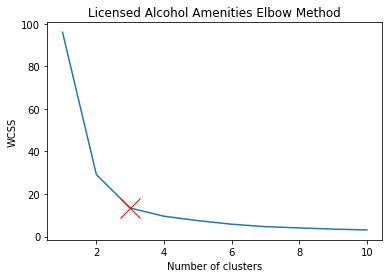

In [17]:
plt.plot(range(1,11), wcss)
plt.title('Licensed Alcohol Amenities Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(3, 13.418367806167069, color='red', marker = 'x', markersize=20, alpha=1)
plt.show()

In [18]:
# graph shows cluster = 2 is a good number
kmeans = KMeans(n_clusters=3, init ='k-means++')
y_kmeans = kmeans.fit_predict(X)

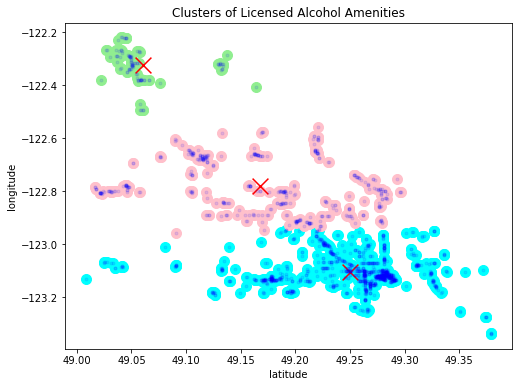

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(alcohol_amenities['lat'], alcohol_amenities['lon'], 'b.',alpha=0.1)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='cyan', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='lightgreen', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='pink', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='red', marker='x', label = 'Centroids',alpha=1)
plt.title('Clusters of Licensed Alcohol Amenities')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()
alcohol_center = kmeans.cluster_centers_

In [20]:
# convert the cluster center locations into pandas dataframe
food_chains_center
food_chain_amenity = np.array([['food chain'],['food chain'],['food chain']])
food_chains_center = np.append(food_chains_center, food_chain_amenity, axis=1)
transport_center
transport_amenity = np.array([['transport'],['transport'],['transport']])
transport_center = np.append(transport_center, transport_amenity, axis=1)
alcohol_center
alcohol_amenity = np.array([['alcohol'],['alcohol'],['alcohol']])
alcohol_center = np.append(alcohol_center, alcohol_amenity, axis=1)
clusters = np.concatenate((food_chains_center,transport_center))
clusters = np.concatenate((clusters,alcohol_center))
clusters

array([['49.24602260337079', '-123.09667009382022', 'food chain'],
       ['49.177177611029414', '-122.78614206544118', 'food chain'],
       ['49.06260741875', '-122.328997215625', 'food chain'],
       ['49.27071874815864', '-123.11658119065156', 'transport'],
       ['49.0313407', '-122.37192776250001', 'transport'],
       ['49.190792572727275', '-122.81188975', 'transport'],
       ['49.250334099215344', '-123.10444344481256', 'alcohol'],
       ['49.061009656862744', '-122.32427729313726', 'alcohol'],
       ['49.16790471935484', '-122.77929155260546', 'alcohol']],
      dtype='<U32')

In [21]:
cluster_centers = pd.DataFrame(data=clusters, columns=['lat', 'lon','amenity'])
cluster_centers

,lat,lon,amenity
0,49.24602260337079,-123.09667009382022,food chain
1,49.177177611029414,-122.78614206544118,food chain
2,49.06260741875,-122.328997215625,food chain
3,49.27071874815864,-123.11658119065156,transport
4,49.0313407,-122.37192776250001,transport
5,49.190792572727275,-122.81188975,transport
6,49.250334099215344,-123.10444344481256,alcohol
7,49.061009656862744,-122.32427729313726,alcohol
8,49.16790471935484,-122.77929155260546,alcohol


In [22]:
cluster_centers.to_json('cluster-centers.json', orient='records', lines=True)

In [23]:
# access all hotel locations
hotel_df = pd.read_json('vancouver-hotels.json',lines=True)
hotel_df

,name,amenity,LOCALITY,tags,lat,lon
0,"Hampton Inn & Suites by Hilton, Downtown Vanco...",Hotels & Motels;,Vancouver,"111 Robson St, Vancouver, BC",49.277779,-123.114212
1,Ramada Limited Downtown Vancouver,Hotels & Motels;,Vancouver,"435 Pender St W, Vancouver, BC",49.283282,-123.112543
2,Fairmont Waterfront,Hotels & Motels;,Vancouver,"900 Canada Pl Way, Vancouver, BC",49.287196,-123.114020
3,Executive Hotel Le Soleil,Hotels & Motels;,Vancouver,"567 Hornby St, Vancouver, BC",49.285521,-123.117273
4,Hilton Vancouver Metrotown,Hotels & Motels;,Burnaby,"6083 McKay Ave, Burnaby, BC",49.228637,-123.003652
...,...,...,...,...,...,...
133,Princess and the Pea B&B,Bed & Breakfasts;,Langley,"21628 - 48th Ave, Langley, BC",49.089233,-122.624069
134,Seahurst House Licensed Short Term Rental,Vacation Rentals;,Richmond,"11631 Seahurst Rd,, Richmond, BC",49.134601,-123.094548
135,St Clair Hostel Vancouver,Hostels;,Vancouver,"577 Richards Street, Vancouver, BC",49.282721,-123.114102
136,"Civic Hotel, Autograph Collection",Hotels & Motels;,Surrey,"13475 Central Avenue, Surrey, BC",49.190556,-122.848330


In [24]:
from math import cos, asin, sqrt
# closest distance between latitude and longitude to find nearest hotels for cluster centers
# functions from https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

hotel_location = hotel_df.filter(items=['lat','lon'])
hotel_location = hotel_location.to_dict('records')

In [25]:
# find closest hotel location for the two cluster centers of food chains
food_chain = cluster_centers[cluster_centers['amenity'] =='food chain']
food_chain.loc[:, ('lat')] = food_chain.loc[:, ('lat')].astype(float)
food_chain.loc[:, ('lon')] = food_chain.loc[:, ('lon')].astype(float)
food_chain = food_chain.drop(columns=['amenity'])
food_chain = food_chain.to_dict('records')
close1 = closest(hotel_location, food_chain[0])
close2 = closest(hotel_location, food_chain[1])
close3 = closest(hotel_location, food_chain[2])

closest_hotels1 = pd.DataFrame(list(close1.items()))
closest_hotels1 = closest_hotels1.T
closest_hotels1 = closest_hotels1.rename(columns={0: "lat", 1: "lon"})
closest_hotels1 = closest_hotels1.drop([0])

closest_hotels2 = pd.DataFrame(list(close2.items()))
closest_hotels2 = closest_hotels2.T
closest_hotels2 = closest_hotels2.rename(columns={0: "lat", 1: "lon"})
closest_hotels2 = closest_hotels2.drop([0])

closest_hotels3 = pd.DataFrame(list(close3.items()))
closest_hotels3 = closest_hotels3.T
closest_hotels3 = closest_hotels3.rename(columns={0: "lat", 1: "lon"})
closest_hotels3 = closest_hotels3.drop([0])

closest_hotels_food_chain = closest_hotels1.append(closest_hotels2)
closest_hotels_food_chain = closest_hotels_food_chain.append(closest_hotels3)
closest_hotels_food_chain.loc[:, ('lat')] = closest_hotels_food_chain.loc[:, ('lat')].astype(float)
closest_hotels_food_chain.loc[:, ('lon')] = closest_hotels_food_chain.loc[:, ('lon')].astype(float)
hotel_food_chains = hotel_df.loc[(hotel_df['lat'].isin(closest_hotels_food_chain['lat'])) & (hotel_df['lon'].isin(closest_hotels_food_chain['lon']))]
hotel_food_chains

C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,name,amenity,LOCALITY,tags,lat,lon
23,Windsor Guest House,Bed & Breakfasts;,Vancouver,"325 W 11th Ave, Vancouver, BC",49.261380,-123.111543
95,Holiday Inn Express & Suites Surrey,Hotels & Motels;,Surrey,"15808 - 104th Ave, Surrey, BC",49.191517,-122.782498
120,L.A. Acres B&B,Bed & Breakfasts;,Langley,"107-248th St, Langley, BC",49.002673,-122.536804


In [26]:
hotel_food_chains.to_json('closest-hotel-food-chains.json', orient='records', lines=True)

In [27]:
# find closest hotel location for the three cluster centers of transportation
transport = cluster_centers[cluster_centers['amenity'] =='transport']
transport.loc[:, ('lat')] = transport.loc[:, ('lat')].astype(float)
transport.loc[:, ('lon')] = transport.loc[:, ('lon')].astype(float)
transport = transport.drop(columns=['amenity'])
transport = transport.to_dict('records')
close1 = closest(hotel_location, transport[0])
close2 = closest(hotel_location, transport[1])
close3 = closest(hotel_location, transport[2])

closest_hotels1 = pd.DataFrame(list(close1.items()))
closest_hotels1 = closest_hotels1.T
closest_hotels1 = closest_hotels1.rename(columns={0: "lat", 1: "lon"})
closest_hotels1 = closest_hotels1.drop([0])

closest_hotels2 = pd.DataFrame(list(close2.items()))
closest_hotels2 = closest_hotels2.T
closest_hotels2 = closest_hotels2.rename(columns={0: "lat", 1: "lon"})
closest_hotels2 = closest_hotels2.drop([0])

closest_hotels3 = pd.DataFrame(list(close3.items()))
closest_hotels3 = closest_hotels3.T
closest_hotels3 = closest_hotels3.rename(columns={0: "lat", 1: "lon"})
closest_hotels3 = closest_hotels3.drop([0])

closest_hotels_transport = closest_hotels1.append(closest_hotels2)
closest_hotels_transport = closest_hotels_transport.append(closest_hotels3)
closest_hotels_transport.loc[:, ('lat')] = closest_hotels_transport.loc[:, ('lat')].astype(float)
closest_hotels_transport.loc[:, ('lon')] = closest_hotels_transport.loc[:, ('lon')].astype(float)
hotel_transport = hotel_df.loc[(hotel_df['lat'].isin(closest_hotels_transport['lat'])) & (hotel_df['lon'].isin(closest_hotels_transport['lon']))]
hotel_transport

C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,name,amenity,LOCALITY,tags,lat,lon
18,Opus Hotel Vancouver,Hotels & Motels;,Vancouver,"322 Davie St, Vancouver, BC",49.274951,-123.122829
27,Sandman Suites Surrey (Guildford),Hotels & Motels;,Surrey,"10608 151A St, Surrey, BC",49.195125,-122.802044
120,L.A. Acres B&B,Bed & Breakfasts;,Langley,"107-248th St, Langley, BC",49.002673,-122.536804


In [28]:
hotel_transport.to_json('closest-hotel-transport.json', orient='records', lines=True)

In [29]:
# find closest hotel location for the three cluster centers of pubs and bars
alcohol = cluster_centers[cluster_centers['amenity'] =='alcohol']
alcohol.loc[:, ('lat')] = alcohol.loc[:, ('lat')].astype(float)
alcohol.loc[:, ('lon')] = alcohol.loc[:, ('lon')].astype(float)
alcohol = alcohol.drop(columns=['amenity'])
alcohol = alcohol.to_dict('records')
close1 = closest(hotel_location, alcohol[0])
close2 = closest(hotel_location, alcohol[1])
close3 = closest(hotel_location, alcohol[2])

closest_hotels1 = pd.DataFrame(list(close1.items()))
closest_hotels1 = closest_hotels1.T
closest_hotels1 = closest_hotels1.rename(columns={0: "lat", 1: "lon"})
closest_hotels1 = closest_hotels1.drop([0])

closest_hotels2 = pd.DataFrame(list(close2.items()))
closest_hotels2 = closest_hotels2.T
closest_hotels2 = closest_hotels2.rename(columns={0: "lat", 1: "lon"})
closest_hotels2 = closest_hotels2.drop([0])

closest_hotels3 = pd.DataFrame(list(close3.items()))
closest_hotels3 = closest_hotels3.T
closest_hotels3 = closest_hotels3.rename(columns={0: "lat", 1: "lon"})
closest_hotels3 = closest_hotels3.drop([0])

closest_hotels_alcohol = closest_hotels1.append(closest_hotels2)
closest_hotels_alcohol = closest_hotels_alcohol.append(closest_hotels3)
closest_hotels_alcohol.loc[:, ('lat')] = closest_hotels_alcohol.loc[:, ('lat')].astype(float)
closest_hotels_alcohol.loc[:, ('lon')] = closest_hotels_alcohol.loc[:, ('lon')].astype(float)
hotel_alcohol = hotel_df.loc[(hotel_df['lat'].isin(closest_hotels_alcohol['lat'])) & (hotel_df['lon'].isin(closest_hotels_alcohol['lon']))]
hotel_alcohol

C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,name,amenity,LOCALITY,tags,lat,lon
23,Windsor Guest House,Bed & Breakfasts;,Vancouver,"325 W 11th Ave, Vancouver, BC",49.261380,-123.111543
95,Holiday Inn Express & Suites Surrey,Hotels & Motels;,Surrey,"15808 - 104th Ave, Surrey, BC",49.191517,-122.782498
120,L.A. Acres B&B,Bed & Breakfasts;,Langley,"107-248th St, Langley, BC",49.002673,-122.536804


In [30]:
hotel_alcohol.to_json('closest-hotel-alcohol.json', orient='records', lines=True)